# Importing Data

In [543]:
#Data Reading
import yfinance as yf
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt



import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA



#baseline modeling
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

In [266]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "ADBE AMD ALXN ALGN GOOG GOOGL AMZN AAL AMGN ADI ANSS AMAT ASML ADSK ADP BIDU BIIB BMRN AVGO CDNS CDW CERN CHTR CHKP CTAS CSCO CTXS CTSH CMCSA CRPT CSGP COST CSX DLTR EBAY EA EXC FB FAST FISV FOX FOXA GILD IDXX ILMN INCY INTC INTU ISRG JD KLAC LRCX LBTYA LBTYK LULU MAR MELI MCHP MU MSFT MDLZ MNDZ NTAP NTES NVDA NXPI ORLY PCAR PAYX PYPL PEP QCOM REGN ROST SGEN SIRI SWKS SPLK SBUX SNPS TMUS TTWO TSLA TXN KHC TCOM ULTA UAL VRSN VRSK VRTX WBA WDC WLTW WDAY XEL XLNX AAPL MSFT ATVI ",
        
        start="2015-01-01",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  99 of 99 completed

1 Failed download:
- MNDZ: No data found, symbol may be delisted


# Data Cleaning 

Dropping every row except price because price is the only thing i want right now

In [267]:
data=data.drop(columns=['Open','High','Low', 'Volume','Adj Close'], axis=1, level=1)

In [268]:
# this shows me there are some stocks the library doesnt have data for
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data.isna().sum())

MNDZ   Close    1336
BMRN   Close       1
VRSK   Close       1
ORLY   Close       1
INTU   Close       1
WDAY   Close       1
ALGN   Close       1
ASML   Close       1
NTAP   Close       1
ADP    Close       1
EA     Close       1
CSCO   Close       1
CSX    Close       1
INTC   Close       1
MSFT   Close       1
ADI    Close       1
GOOGL  Close       1
LULU   Close       1
FB     Close       1
ADBE   Close       1
JD     Close       1
LBTYK  Close       1
CERN   Close       1
BIIB   Close       1
QCOM   Close       1
SWKS   Close       1
ILMN   Close       1
BIDU   Close       1
NXPI   Close       1
PCAR   Close       1
AMZN   Close       1
ULTA   Close       1
AAL    Close       1
AAPL   Close       1
CTSH   Close       1
AVGO   Close       1
IDXX   Close       1
PAYX   Close       1
CMCSA  Close       1
TMUS   Close       1
DLTR   Close       1
FISV   Close       1
CHKP   Close       1
VRTX   Close       1
GOOG   Close       1
AMAT   Close       1
CDNS   Close       1
CRPT   Close 

In [269]:
#try to drill down further 
#map out data understanding 
    # look at broad similiraties
    # maybe see if they are going to last in the sets
        #see who fell out 
            #see what they are doing 
    #

In [270]:
#dropped because library doesnt have good data for them
data=data.drop(columns=['MNDZ','CRPT','KHC','PYPL','FOXA','FOX'])

In [271]:
data.columns=data.columns.droplevel(level=1)

In [272]:
data.dropna(inplace=True)

In [273]:
data_daily_change=data.pct_change()

In [274]:
data

,BMRN,VRSK,ORLY,INTU,WDAY,ALGN,ASML,NTAP,ADP,EA,...,MELI,ROST,MU,CSGP,ANSS,AMD,INCY,NTES,GILD,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,92.169998,63.412273,192.110001,86.348923,80.410004,56.200001,101.756577,36.317932,74.043793,46.869999,...,124.582504,44.497429,34.750000,180.130005,81.639999,2.670000,73.760002,90.117744,82.371887,38.871979
2015-01-05,93.110001,62.589512,188.720001,86.008102,80.010002,56.990002,98.336266,35.082809,73.990479,46.570000,...,123.048119,44.464203,33.779999,176.550003,80.860001,2.660000,74.220001,90.655869,84.003517,38.158737
2015-01-06,90.279999,62.371429,188.080002,83.366821,79.419998,57.450001,95.427589,34.767464,73.377068,45.959999,...,120.850479,44.549641,32.869999,175.830002,79.260002,2.630000,71.489998,92.206299,84.749908,37.605968
2015-01-07,93.760002,62.411076,189.789993,84.183296,79.349998,59.570000,95.967644,34.947792,74.017120,46.810001,...,120.612877,45.418427,32.099998,176.770004,79.709999,2.580000,74.449997,93.592590,86.338158,37.623795
2015-01-08,94.180000,63.035587,193.240005,85.313072,82.779999,61.439999,97.976242,35.669083,75.715103,48.130001,...,122.414551,46.021339,33.669998,180.039993,81.660004,2.610000,73.209999,94.057724,88.785614,38.461864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,85.220001,149.110001,367.679993,257.440002,142.580002,180.339996,292.399994,41.209999,136.919998,118.099998,...,612.710022,87.190002,45.529999,631.609985,257.820007,56.950001,95.660004,362.209991,76.540001,89.610001
2020-04-17,89.120003,153.789993,373.510010,265.359985,149.300003,193.000000,295.649994,42.150002,141.080002,115.150002,...,597.500000,91.720001,45.700001,635.549988,263.899994,56.599998,100.000000,348.640015,83.989998,89.000000
2020-04-20,93.199997,149.320007,373.660004,264.000000,150.899994,196.710007,291.579987,40.950001,139.820007,115.410004,...,601.640015,86.510002,43.400002,603.530029,266.720001,56.970001,101.190002,348.829987,81.260002,89.080002


In [275]:
#this normalizes my stocks so i can compare them with each other
data_daily_change.dropna(inplace=True)

In [276]:
data_daily_change

,BMRN,VRSK,ORLY,INTU,WDAY,ALGN,ASML,NTAP,ADP,EA,...,MELI,ROST,MU,CSGP,ANSS,AMD,INCY,NTES,GILD,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,0.010199,-0.012975,-0.017646,-0.003947,-0.004975,0.014057,-0.033613,-0.034009,-0.000720,-0.006401,...,-0.012316,-0.000747,-0.027914,-0.019875,-0.009554,-0.003745,0.006236,0.005971,0.019808,-0.018348
2015-01-06,-0.030394,-0.003484,-0.003391,-0.030710,-0.007374,0.008072,-0.029579,-0.008989,-0.008290,-0.013099,...,-0.017860,0.001921,-0.026939,-0.004078,-0.019787,-0.011278,-0.036783,0.017102,0.008885,-0.014486
2015-01-07,0.038547,0.000636,0.009092,0.009794,-0.000881,0.036902,0.005659,0.005187,0.008723,0.018494,...,-0.001966,0.019502,-0.023426,0.005346,0.005677,-0.019011,0.041404,0.015035,0.018740,0.000474
2015-01-08,0.004480,0.010006,0.018178,0.013420,0.043226,0.031392,0.020930,0.020639,0.022940,0.028199,...,0.014938,0.013275,0.048910,0.018499,0.024464,0.011628,-0.016655,0.004970,0.028347,0.022275
2015-01-09,-0.004247,-0.007863,-0.028100,-0.021033,-0.002174,0.018555,-0.012765,0.002466,-0.007162,-0.012882,...,-0.011079,-0.017949,-0.004158,-0.015774,-0.011021,0.007663,-0.016118,0.004363,-0.000880,-0.000927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,0.034726,0.013457,0.038967,0.021749,-0.023893,-0.018985,0.035081,0.019293,-0.005231,0.040437,...,0.040891,-0.015470,-0.019384,-0.015002,0.015119,0.035643,0.051787,0.035418,0.025593,0.064758
2020-04-17,0.045764,0.031386,0.015856,0.030764,0.047131,0.070201,0.011115,0.022810,0.030383,-0.024979,...,-0.024824,0.051955,0.003734,0.006238,0.023582,-0.006146,0.045369,-0.037464,0.097335,-0.006807
2020-04-20,0.045781,-0.029066,0.000402,-0.005125,0.010717,0.019223,-0.013766,-0.028470,-0.008931,0.002258,...,0.006929,-0.056803,-0.050328,-0.050381,0.010686,0.006537,0.011900,0.000545,-0.032504,0.000899


In [277]:
# Volitility is the measure of risk. I am going to break up stocks based on the thier average volitlitly
#Risk level is going to depend on the volitility basket

In [278]:
volitlitiy=pd.DataFrame(data_daily_change.std())

In [279]:
volitlitiy.describe()


,0
count,93.000000
mean,0.020754
std,0.004904
min,0.012723
25%,0.016921
50%,0.019487
75%,0.024270
max,0.040975


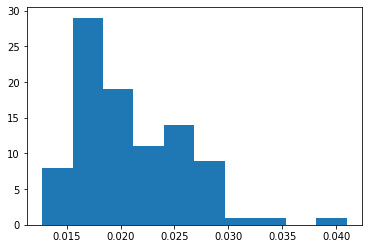

In [280]:
plt.hist(volitlitiy[0]);

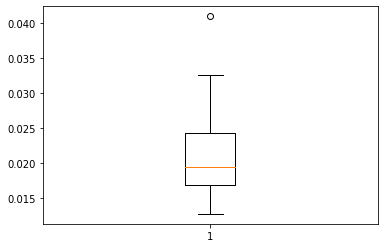

In [281]:
x = plt.boxplot(volitlitiy[0])

In [282]:
#Now i am going to break up my stocks based on vols 
#for stocks in the 0-50 percentile i am going to call these stocks low vol==low risk stock
#for stocks in the 50-75 percentile tile i am going to call these medium vol stocks 
#for stocks in the 75-100 perctile thes are high vol stocks

In [283]:
low_vol=volitlitiy[volitlitiy[0]<.0194]

In [284]:
mid_vol= volitlitiy[(volitlitiy[0] > .0194) & (volitlitiy[0] < .0241) ]

In [285]:
high_vol=volitlitiy[volitlitiy[0]>.02]

In [286]:
#Normalized data split in low medium and high

In [287]:
low_vol_data=data_daily_change[list(low_vol.index)]

In [288]:
low_vol_data=data_daily_change[['CHTR', 'EBAY', 'GOOG', 'VRSK', 'PAYX', 'CDW', 'GOOGL', 'TXN', 'CSCO',
       'WBA', 'XEL', 'PCAR', 'SBUX', 'TMUS', 'ADBE', 'MSFT', 'CERN', 'IDXX',
       'AMZN', 'CHKP', 'SNPS', 'AAPL', 'FAST', 'PEP', 'CMCSA', 'VRSN', 'WLTW',
       'COST', 'CSGP', 'ADP', 'EXC', 'FB', 'ANSS', 'CTAS', 'CTXS', 'GILD',
       'SIRI', 'INTU', 'ROST', 'ISRG', 'FISV', 'CTSH', 'CDNS', 'ORLY', 'AMGN',
       'MDLZ']]

In [289]:
low_vol_data

,CHTR,EBAY,GOOG,VRSK,PAYX,CDW,GOOGL,TXN,CSCO,WBA,...,SIRI,INTU,ROST,ISRG,FISV,CTSH,CDNS,ORLY,AMGN,MDLZ
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.035631,-0.008361,-0.020846,-0.012975,0.001730,-0.010614,-0.019054,-0.015520,-0.019920,-0.019737,...,-0.022988,-0.003947,-0.000747,-0.021310,-0.011328,-0.006265,-0.022836,-0.017646,-0.011883,-0.014950
2015-01-06,-0.026106,-0.012917,-0.023177,-0.003484,-0.007124,-0.014497,-0.024679,-0.016524,-0.000370,0.002550,...,-0.014706,-0.030710,0.001921,0.010537,0.001003,-0.025984,-0.026630,-0.003391,-0.032217,-0.006898
2015-01-07,0.003071,-0.001636,-0.001713,0.000636,0.018265,0.020889,-0.002941,0.017961,0.009242,0.025573,...,0.017910,0.009794,0.019502,0.005483,0.013593,0.032758,0.028476,0.009092,0.034925,0.031398
2015-01-08,0.039225,0.026944,0.003153,0.010006,0.015588,0.025072,0.003484,0.016315,0.007692,0.012402,...,0.038123,0.013420,0.013275,0.019822,0.020328,0.023362,0.010315,0.018178,-0.003602,0.012662
2015-01-09,-0.005892,-0.013827,-0.012951,-0.007863,-0.008831,0.003936,-0.012211,0.000560,0.010178,-0.024243,...,-0.002825,-0.021033,-0.017949,-0.022758,-0.002905,0.004454,-0.003224,-0.028100,-0.012304,-0.009843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,0.000060,0.028461,0.000792,0.013457,-0.017260,0.005498,0.000103,0.031580,-0.000482,-0.004834,...,0.000000,0.021749,-0.015470,-0.001096,0.022101,-0.009049,0.038177,0.038967,0.041028,-0.005213
2020-04-17,0.006185,0.006448,0.015655,0.031386,0.058491,0.043837,0.017154,0.019391,0.023614,0.029378,...,-0.001887,0.030764,0.051955,0.031130,0.051186,0.045463,0.000764,0.015856,0.017627,0.000936
2020-04-20,-0.001502,0.004805,-0.012967,-0.029066,-0.015407,-0.029590,-0.013956,-0.017790,0.001412,-0.037079,...,-0.013233,-0.005125,-0.056803,-0.015200,-0.033688,-0.023787,-0.010299,0.000402,0.006937,0.000187


In [290]:
mid_vol.index

Index(['ASML', 'NTAP', 'EA', 'CSX', 'INTC', 'ADI', 'LBTYK', 'QCOM', 'BIDU',
       'AVGO', 'DLTR', 'AMAT', 'LBTYA', 'MAR', 'ADSK', 'ATVI', 'TTWO', 'KLAC',
       'REGN', 'MCHP', 'XLNX'],
      dtype='object')

In [291]:
mid_vol_data=data_daily_change[[ 'BMRN','TTWO', 'CSX', 'KLAC', 'QCOM', 'ADI', 'ASML', 'XLNX', 'BIDU',
       'REGN', 'LRCX', 'AMAT', 'AVGO', 'MCHP', 'DLTR', 'MAR', 'EA', 'INTC',
       'LBTYA', 'LBTYK', 'ATVI', 'NTAP', 'ADSK']]

In [292]:
mid_vol_data

,BMRN,TTWO,CSX,KLAC,QCOM,ADI,ASML,XLNX,BIDU,REGN,...,MCHP,DLTR,MAR,EA,INTC,LBTYA,LBTYK,ATVI,NTAP,ADSK
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,0.010199,-0.017082,-0.027057,-0.022336,-0.004712,-0.018185,-0.033613,-0.018348,-0.014748,0.005632,...,-0.022286,-0.010377,-0.027395,-0.006401,-0.011276,-0.047106,-0.045718,-0.013910,-0.034009,-0.014614
2015-01-06,-0.030394,0.011224,-0.039851,-0.029540,-0.014203,-0.023473,-0.029579,-0.014486,0.001774,-0.037772,...,-0.019376,-0.013646,-0.012563,-0.013099,-0.018637,-0.003351,-0.000217,-0.018640,-0.008989,-0.019775
2015-01-07,0.038547,0.006087,0.013138,0.016644,0.011663,0.010517,0.005659,0.000474,0.018939,0.027287,...,0.005579,0.031455,0.022901,0.018494,0.020975,0.000210,-0.003903,-0.021561,0.005187,-0.002087
2015-01-08,0.004480,0.012811,0.015915,0.016667,0.010579,0.017655,0.020930,0.022275,0.021663,-0.010963,...,0.031900,0.003953,0.033124,0.028199,0.018601,0.003782,0.005877,0.009969,0.020639,0.024747
2015-01-09,-0.004247,-0.020731,-0.002031,0.003482,-0.001208,-0.000730,-0.012765,-0.000927,-0.010078,0.019318,...,-0.002688,-0.023204,-0.002281,-0.012882,0.001908,-0.003559,-0.004544,-0.018182,0.002466,-0.009014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,0.034726,0.026883,-0.004106,0.022386,0.011317,0.013738,0.035081,0.064758,0.019332,0.055190,...,-0.012855,0.029965,-0.004212,0.040437,0.032614,0.008319,0.007602,0.035611,0.019293,0.010997
2020-04-17,0.045764,-0.018767,0.035125,0.029110,-0.008848,0.009526,0.011115,-0.006807,0.021202,0.053451,...,0.035843,0.016163,0.048140,-0.024979,-0.007074,0.002750,0.003482,-0.017193,0.022810,0.058129
2020-04-20,0.045781,0.007313,-0.028198,-0.030457,-0.024419,-0.018385,-0.013766,0.000899,-0.003048,-0.001406,...,-0.032736,-0.031078,-0.053288,0.002258,-0.019549,0.001646,0.002892,-0.005682,-0.028470,-0.016967


In [293]:
high_vol_data=data_daily_change[['BMRN', 'TTWO', 'BIIB', 'AAL', 'SPLK', 'KLAC', 'TSLA', 'QCOM', 'NVDA',
       'ASML', 'TCOM', 'VRTX', 'XLNX', 'BIDU', 'REGN', 'WDAY', 'LRCX', 'AMAT',
       'AVGO', 'MCHP', 'SGEN', 'NTES', 'ULTA', 'AMD', 'DLTR', 'MELI', 'UAL',
       'SWKS', 'WDC', 'NXPI', 'EA', 'ALGN', 'LULU', 'LBTYA', 'ATVI', 'MU',
       'ILMN', 'ALXN', 'JD', 'NTAP', 'ADSK', 'INCY']]

In [294]:
high_vol_data

,BMRN,TTWO,BIIB,AAL,SPLK,KLAC,TSLA,QCOM,NVDA,ASML,...,LULU,LBTYA,ATVI,MU,ILMN,ALXN,JD,NTAP,ADSK,INCY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,0.010199,-0.017082,-0.015409,-0.000557,-0.033169,-0.022336,-0.042041,-0.004712,-0.016890,-0.033613,...,0.011203,-0.047106,-0.013910,-0.027914,0.028584,-0.023741,0.023314,-0.034009,-0.014614,0.006236
2015-01-06,-0.030394,0.011224,-0.006207,-0.015590,-0.018649,-0.029540,0.005664,-0.014203,-0.030318,-0.029579,...,-0.006969,-0.003351,-0.018640,-0.026939,-0.012636,-0.023165,-0.002034,-0.008989,-0.019775,-0.036783
2015-01-07,0.038547,0.006087,0.055551,-0.000566,0.008426,0.016644,-0.001562,0.011663,-0.002606,0.005659,...,0.037430,0.000210,-0.021561,-0.023426,0.035102,0.056083,0.011415,0.005187,-0.002087,0.041404
2015-01-08,0.004480,0.012811,-0.008464,0.012262,0.039111,0.016667,-0.001564,0.010579,0.037617,0.020930,...,0.024631,0.003782,0.009969,0.048910,0.009748,-0.021976,0.010883,0.020639,0.024747,-0.016655
2015-01-09,-0.004247,-0.020731,-0.022584,-0.030563,-0.013858,0.003482,-0.018802,-0.001208,0.004029,-0.012765,...,-0.007449,-0.003559,-0.018182,-0.004158,-0.010263,0.002557,-0.005582,0.002466,-0.009014,-0.016118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,0.034726,0.026883,0.034869,-0.099268,0.007890,0.022386,0.021073,0.011317,0.049352,0.035081,...,0.005963,0.008319,0.035611,-0.019384,0.031296,0.017124,0.065022,0.019293,0.010997,0.051787
2020-04-17,0.045764,-0.018767,0.012443,0.045167,0.027210,0.029110,0.011648,-0.008848,-0.008076,0.011115,...,0.079688,0.002750,-0.017193,0.003734,0.042372,0.049493,-0.028421,0.022810,0.058129,0.045369
2020-04-20,0.045781,0.007313,-0.009166,-0.044079,-0.013096,-0.030457,-0.009988,-0.024419,-0.018028,-0.013766,...,-0.032188,0.001646,-0.005682,-0.050328,0.020609,0.031310,-0.020585,-0.028470,-0.016967,0.011900


# EDA on low volitlity stocks

There are multiple things i want to achieve during my eda. 
First i want to see how my stocks look in general. I want to see if i can recognize outliers and also uncover correlations that might matter.

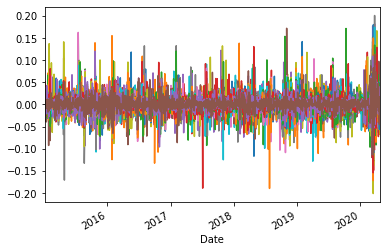

In [295]:
low_vol_data.plot(legend=False)


In [296]:
#one thing i am noticing are big spikes that are occuring
# i am guessing these spikes are due to earnings or other company relate news

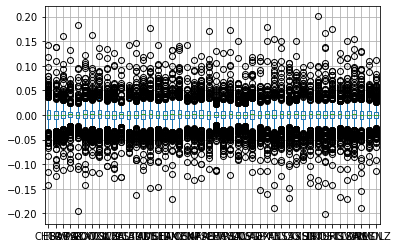

In [297]:
low_vol_data.boxplot()

In [298]:
low_vol_data_abs=np.abs(low_vol_data)

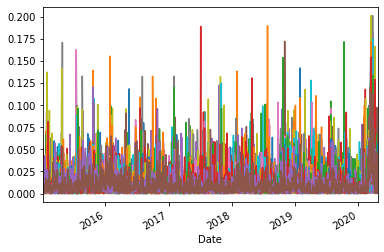

In [299]:
low_vol_data_abs.plot(legend=False)

In [300]:
low_vol_data_abs[low_vol_data_abs[]]
#how to get vals less than .1
#scale first use log maybe standard scale instead of removing outliers

SyntaxError: invalid syntax (<ipython-input-300-ab0ebda76650>, line 1)

In [ ]:
#the average percent change is 1.09%

In [ ]:
low_val_data.mean()

In [ ]:
#see the average move for direction up and down 

In [301]:
low_vol_data_corr=low_vol_data.corr()

In [302]:
low_vol_data_corr=low_vol_data_corr[low_vol_data_corr>.5]

In [303]:
low_vol_data_corr

,CHTR,EBAY,GOOG,VRSK,PAYX,CDW,GOOGL,TXN,CSCO,WBA,...,SIRI,INTU,ROST,ISRG,FISV,CTSH,CDNS,ORLY,AMGN,MDLZ
CHTR,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EBAY,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG,NaN,NaN,1.000000,0.516535,0.558657,0.513423,0.993523,0.566732,0.571520,NaN,...,NaN,0.592986,NaN,0.548350,0.593593,0.510616,0.553518,NaN,NaN,NaN
VRSK,NaN,NaN,0.516535,1.000000,0.663795,0.508303,0.518818,0.535168,0.543793,NaN,...,NaN,0.632191,NaN,0.528351,0.673197,0.533918,0.544039,NaN,0.501147,0.560574
PAYX,NaN,NaN,0.558657,0.663795,1.000000,0.589519,0.565348,0.588491,0.645982,NaN,...,0.537680,0.719757,0.517939,0.568651,0.713832,0.600797,0.588332,0.511962,0.532500,0.591344
CDW,NaN,NaN,0.513423,0.508303,0.589519,1.000000,0.516084,0.545731,0.563657,NaN,...,0.514995,0.567323,NaN,0.505203,0.578667,NaN,0.547792,NaN,NaN,NaN
GOOGL,NaN,NaN,0.993523,0.518818,0.565348,0.516084,1.000000,0.570207,0.572813,NaN,...,NaN,0.599260,NaN,0.552996,0.600116,0.517697,0.559330,NaN,0.500146,NaN
TXN,NaN,NaN,0.566732,0.535168,0.588491,0.545731,0.570207,1.000000,0.631393,NaN,...,0.521822,0.593647,NaN,0.530142,0.577448,0.560289,0.613544,NaN,0.539006,NaN
CSCO,NaN,NaN,0.571520,0.543793,0.645982,0.563657,0.572813,0.631393,1.000000,NaN,...,NaN,0.626455,NaN,0.551655,0.575480,0.550202,0.550794,NaN,0.522307,0.502015
WBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation analysis EDA

Find intresting correlations that might help me out. What i am going to do is create a general model for a group that is correlating well with each other. I am going to choose the most well known stocks out of this group and see if they have correlations with others. There is one  requriement i need to make a group. The requirement is that the cetain stock i picked must correlate to about half of the other stocks in my group

In [304]:
#model Google stocks
#after modeling then try to identify clusters which stocks are similar and not 

In [305]:
#valueable to diverify pick stokcs from diffrent groups pick diffrent stocks 

In [306]:
#Google is my first stock i picked to see if correlations exist.

In [307]:
Group1_low=low_vol_data_corr['GOOG'].dropna()

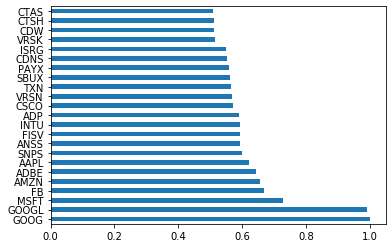

In [308]:
Group1_low.sort_values(ascending=False).head(23).plot(kind='barh')

In [309]:
# Big tech companies follow google the most. Some companies include Apple,Microsoft, Facebook
#This will be one group i will be creating general models on. It fits my requirements too

In [310]:
Group2_low=low_vol_data_corr['VRSK'].dropna()

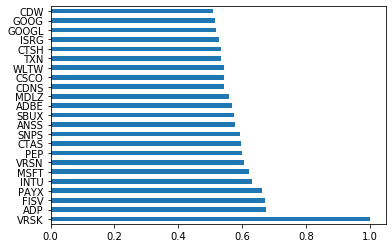

In [311]:
Group2_low.sort_values(ascending=False).head(23).plot(kind='barh')

In [312]:
#second group

In [313]:
Group3_low=low_vol_data_corr['PAYX'].dropna()

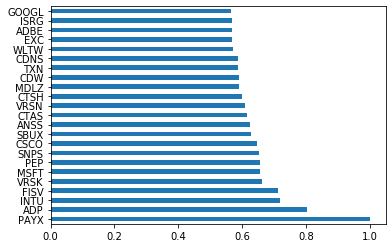

In [314]:
Group3_low.sort_values(ascending=False).head(23).plot(kind='barh')

In [315]:
Group4_low=low_vol_data_corr['CDW'].dropna()

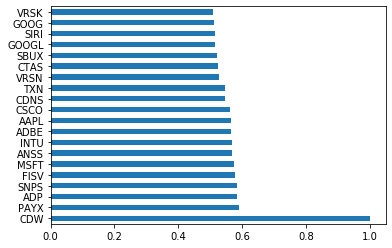

In [316]:
Group4_low.sort_values(ascending=False).head(20).plot(kind='barh')

In [317]:
Group5_low=low_vol_data_corr['TXN'].dropna()

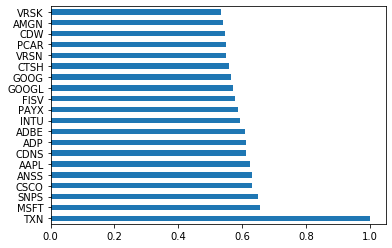

In [318]:
Group5_low.sort_values(ascending=False).head(20).plot(kind='barh')

In [319]:
Group6_low=low_vol_data_corr['CSCO'].dropna()

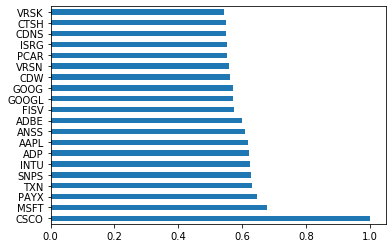

In [320]:
Group6_low.sort_values(ascending=False).head(20).plot(kind='barh')

In [321]:
Group7_low=low_vol_data_corr['SBUX'].dropna()

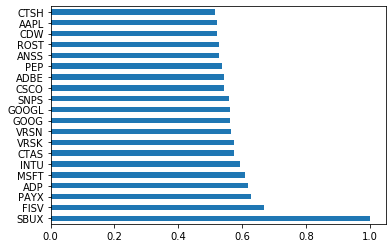

In [322]:
Group7_low.sort_values(ascending=False).head(20).plot(kind='barh')

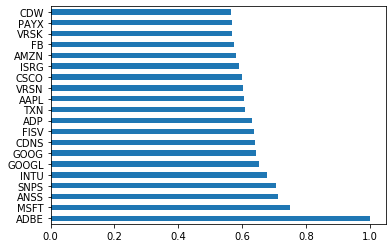

In [323]:
Group8_low=low_vol_data_corr['ADBE'].dropna()
Group8_low.sort_values(ascending=False).head(20).plot(kind='barh')


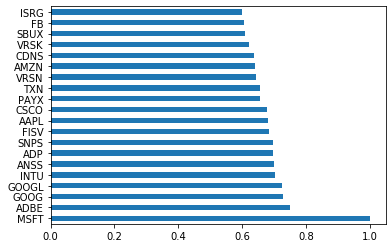

In [324]:
Group9_low=low_vol_data_corr['MSFT'].dropna()
Group9_low.sort_values(ascending=False).head(20).plot(kind='barh')

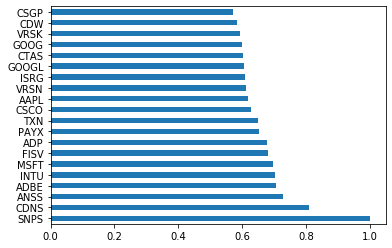

In [325]:
Group10_low=low_vol_data_corr['SNPS'].dropna()
Group10_low.sort_values(ascending=False).head(20).plot(kind='barh')

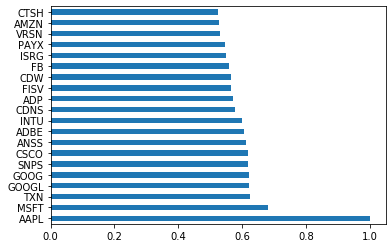

In [326]:
Group11_low=low_vol_data_corr['AAPL'].dropna()
Group11_low.sort_values(ascending=False).head(20).plot(kind='barh')

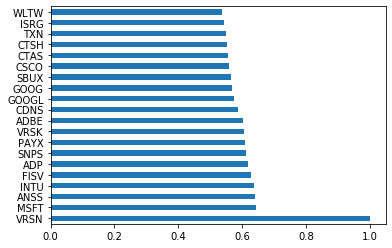

In [327]:
Group12_low=low_vol_data_corr['VRSN'].dropna()
Group12_low.sort_values(ascending=False).head(20).plot(kind='barh')

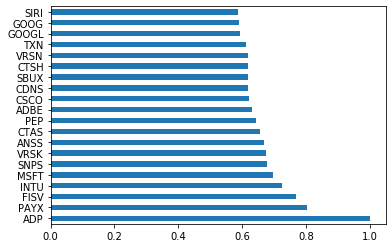

In [328]:
Group13_low=low_vol_data_corr['ADP'].dropna()
Group13_low.sort_values(ascending=False).head(20).plot(kind='barh')

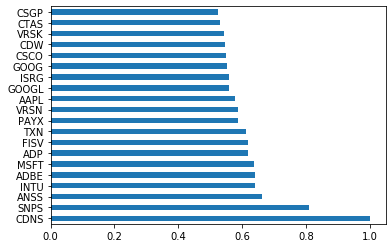

In [329]:
Group14_low=low_vol_data_corr['CDNS'].dropna()
Group14_low.sort_values(ascending=False).head(20).plot(kind='barh')

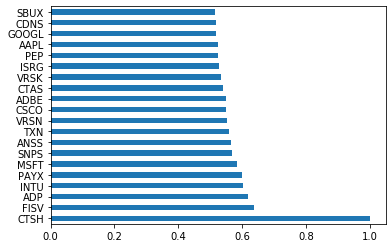

In [330]:
Group15_low=low_vol_data_corr['CTSH'].dropna()
Group15_low.sort_values(ascending=False).head(20).plot(kind='barh')

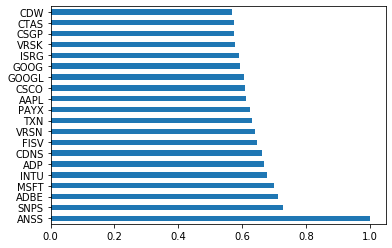

In [331]:
Group16_low=low_vol_data_corr['ANSS'].dropna()
Group16_low.sort_values(ascending=False).head(20).plot(kind='barh')

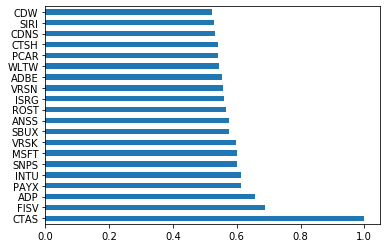

In [332]:
Group17_low=low_vol_data_corr['CTAS']
Group17_low.sort_values(ascending=False).head(20).plot(kind='barh')

In [333]:
# Overall i found some really intresting correlations within the stocs i picked. I plan on creating general models for each of these groups
#This will help me save time and computing power
# This is one method i will try to get the most accurate prediction per model

# Decomposing my groups to understand them better

In [334]:
seas

NameError: name 'seas' is not defined

In [ ]:
GOOG=pd.DataFrame(low_vol_data['GOOG'])

In [335]:
Group1_low_decompose=seasonal_decompose(GOOG,freq=30).plot()

NameError: name 'seasonal_decompose' is not defined

In [336]:
#Trend looks stationary,we can see some seasonality 

In [337]:
Group2_low_decompose=seasonal_decompose(low_vol_data['VRSK'],freq=30)
Group2_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [338]:
#trend looks stationary with some drops, looks like a little seasonality


In [339]:
Group3_low_decompose=seasonal_decompose(low_vol_data['PAYX'],freq=30)
Group3_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [340]:
#trend is flat with some seasonality

In [341]:
Group4_low_decompose=seasonal_decompose(low_vol_data['CDW'],freq=30)
Group4_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [342]:
#trend is mostly flat with some seasonality

In [343]:
Group5_low_decompose=seasonal_decompose(low_vol_data['TXN'],freq=30)
Group5_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [344]:
#trend is flat but there are multiple min and max points some seasonality

In [345]:
Group6_low_decompose=seasonal_decompose(low_vol_data['CSCO'],freq=30)
Group6_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [346]:
#trend is flat but identifiable mins and maxes some seasonality

In [347]:
Group7_low_decompose=seasonal_decompose(low_vol_data['SBUX'],freq=30)
Group7_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [348]:
#flat trend some seasonality

In [349]:
Group8_low_decompose=seasonal_decompose(low_vol_data['ADBE'],freq=30)
Group8_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [350]:
#trend is flat but it has identiable min and max points,some seasonality

In [351]:
Group9_low_decompose=seasonal_decompose(low_vol_data['MSFT'],freq=30)
Group9_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [352]:
#flat trend with some seasonality

In [353]:
Group10_low_decompose=seasonal_decompose(low_vol_data['SNPS'],freq=30)
Group10_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [354]:
#flat trend and some seasonality

In [355]:
Group11_low_decompose=seasonal_decompose(low_vol_data['AAPL'],freq=30)
Group11_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [356]:
#flat trend but very noticable mins some seasonality

In [357]:
Group12_low_decompose=seasonal_decompose(low_vol_data['VRSN'],freq=30)
Group12_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [358]:
#flat trend some seasonality

In [359]:
Group13_low_decompose=seasonal_decompose(low_vol_data['ADP'],freq=30)
Group13_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [360]:
#some seasonality flat trend

In [361]:
Group14_low_decompose=seasonal_decompose(low_vol_data['CDNS'],freq=30)
Group14_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [362]:
#trend is flat slight seasonality

In [363]:
Group15_low_decompose=seasonal_decompose(low_vol_data['CTSH'],freq=30)
Group15_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [364]:
#flat trend some seasonality

In [365]:
Group16_low_decompose=seasonal_decompose(low_vol_data['ANSS'],freq=30)
Group16_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [366]:
#some seasonality trend looks flat

In [367]:
Group17_low_decompose=seasonal_decompose(low_vol_data['CTAS'],freq=30)
Group17_low_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [368]:
#flat trend some seasonality

In [369]:
#for all my groups it seems like all the trends are flat with some seasonality. Some trends have observable mins and maxes

# Mid volitility EDA

I am going to do some eda on my mid volitlity stocks


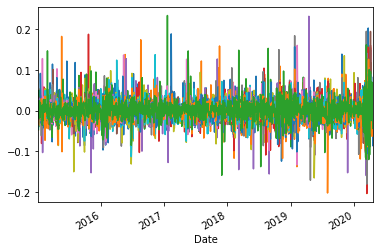

In [370]:
mid_vol_data.plot(legend=False)

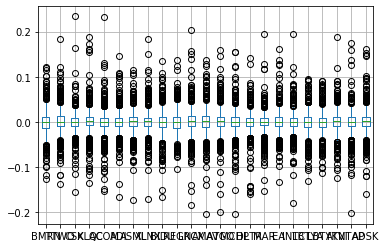

In [371]:
mid_vol_data.boxplot()

In [372]:
mid_vol_data_abs=np.abs(mid_vol_data)

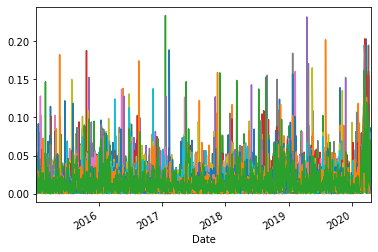

In [373]:
mid_vol_data_abs.plot(legend=False)

In [374]:
#these spikes are due to earnings or company related news most likely

# Correaltion analysis for mid volitility stocks

In [375]:
mid_vol_data_corr=mid_vol_data.corr()

In [376]:
mid_vol_data_corr=mid_vol_data_corr[mid_vol_data_corr>.5]

In [377]:
mid_vol_data_corr

,BMRN,TTWO,CSX,KLAC,QCOM,ADI,ASML,XLNX,BIDU,REGN,...,MCHP,DLTR,MAR,EA,INTC,LBTYA,LBTYK,ATVI,NTAP,ADSK
BMRN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTWO,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.591801,NaN,NaN,NaN,0.620834,NaN,NaN
CSX,NaN,NaN,1.000000,NaN,NaN,0.535405,NaN,NaN,NaN,NaN,...,0.521491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KLAC,NaN,NaN,NaN,1.000000,0.501439,0.680470,0.677312,0.608628,NaN,NaN,...,0.685095,NaN,NaN,NaN,0.627071,NaN,NaN,NaN,NaN,0.523811
QCOM,NaN,NaN,NaN,0.501439,1.000000,0.552925,0.506289,NaN,NaN,NaN,...,0.538530,NaN,NaN,NaN,0.513667,NaN,NaN,NaN,NaN,NaN
ADI,NaN,NaN,0.535405,0.680470,0.552925,1.000000,0.663240,0.677319,NaN,NaN,...,0.802009,NaN,NaN,NaN,0.644982,NaN,NaN,NaN,NaN,0.530001
ASML,NaN,NaN,NaN,0.677312,0.506289,0.663240,1.000000,0.575901,NaN,NaN,...,0.692999,NaN,0.521272,NaN,0.602832,NaN,NaN,NaN,NaN,0.566727
XLNX,NaN,NaN,NaN,0.608628,NaN,0.677319,0.575901,1.000000,NaN,NaN,...,0.660287,NaN,NaN,NaN,0.595706,NaN,NaN,NaN,NaN,NaN
BIDU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGN,0.520041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


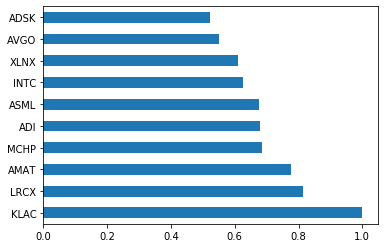

In [378]:
Group1_mid=mid_vol_data_corr['KLAC'].dropna()
Group1_mid.sort_values(ascending=False).head(10).plot(kind='barh')

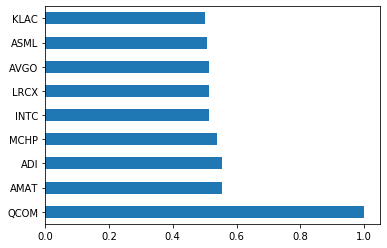

In [379]:
Group2_mid=mid_vol_data_corr['QCOM'].dropna()
Group2_mid.sort_values(ascending=False).head(10).plot(kind='barh')

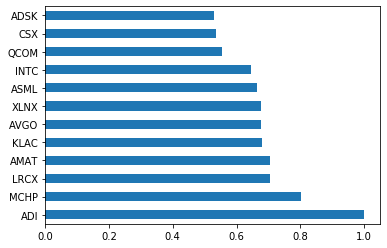

In [380]:
Group3_mid=mid_vol_data_corr['ADI'].dropna()
Group3_mid.sort_values(ascending=False).head(13).plot(kind='barh')

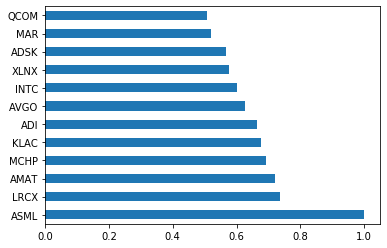

In [381]:
Group4_mid=mid_vol_data_corr['ASML'].dropna()
Group4_mid.sort_values(ascending=False).head(13).plot(kind='barh')

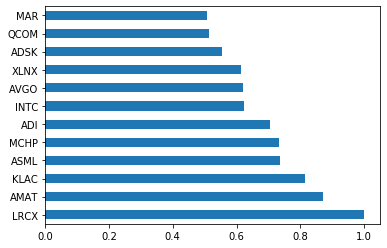

In [382]:
Group5_mid=mid_vol_data_corr['LRCX'].dropna()
Group5_mid.sort_values(ascending=False).head(13).plot(kind='barh')

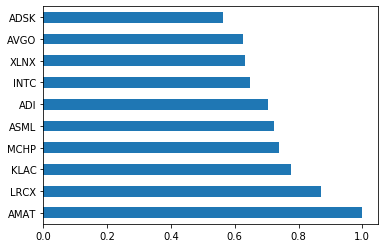

In [383]:
Group6_mid=mid_vol_data_corr['AMAT'].dropna()
Group6_mid.sort_values(ascending=False).head(10).plot(kind='barh')

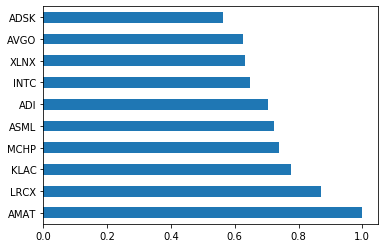

In [384]:
Group7_mid=mid_vol_data_corr['AMAT'].dropna()
Group7_mid.sort_values(ascending=False).head(10).plot(kind='barh')

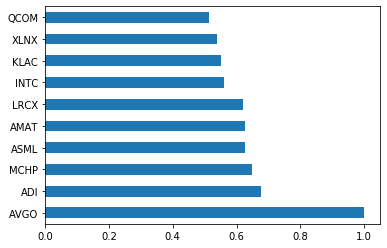

In [385]:
Group8_mid=mid_vol_data_corr['AVGO'].dropna()
Group8_mid.sort_values(ascending=False).head(10).plot(kind='barh')

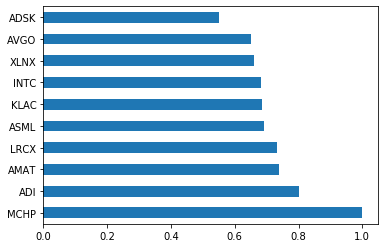

In [386]:
Group9_mid=mid_vol_data_corr['MCHP'].dropna()
Group9_mid.sort_values(ascending=False).head(10).plot(kind='barh')

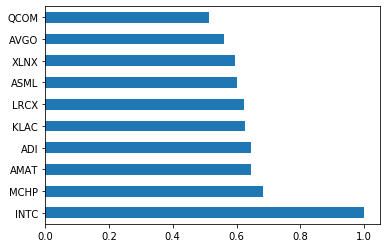

In [387]:
Group10_mid=mid_vol_data_corr['INTC'].dropna()
Group10_mid.sort_values(ascending=False).head(10).plot(kind='barh')

# Decompose my groups
This helps me get a better understanding of my data

In [388]:
Group1_mid_decompose=seasonal_decompose(mid_vol_data['KLAC'],freq=30)
Group1_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [389]:
#looks like trend is flat some seasonality

In [390]:
Group2_mid_decompose=seasonal_decompose(mid_vol_data['QCOM'],freq=30)
Group2_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [391]:
#trend looks flat some seasonality

In [392]:
Group3_mid_decompose=seasonal_decompose(mid_vol_data['ADI'],freq=30)
Group3_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [393]:
#flat trend some seasonality

In [394]:
Group4_mid_decompose=seasonal_decompose(mid_vol_data['ASML'],freq=30)
Group4_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [395]:
Group5_mid_decompose=seasonal_decompose(mid_vol_data['LRCX'],freq=30)
Group5_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [396]:
Group7_mid_decompose=seasonal_decompose(mid_vol_data['AMAT'],freq=30)
Group7_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [397]:
Group8_mid_decompose=seasonal_decompose(mid_vol_data['AVGO'],freq=30)
Group8_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [398]:
Group9_mid_decompose=seasonal_decompose(mid_vol_data['MCHP'],freq=30)
Group9_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [399]:
Group10_mid_decompose=seasonal_decompose(mid_vol_data['INTC'],freq=30)
Group10_mid_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [400]:
# these look the same as my low volitilitly group flat trend and some seasonal aspect

# High Volitility group

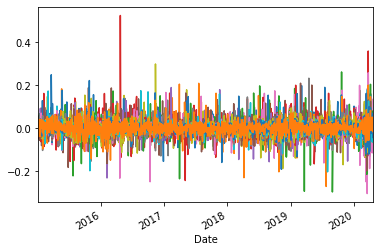

In [401]:
high_vol_data.plot(legend=False)

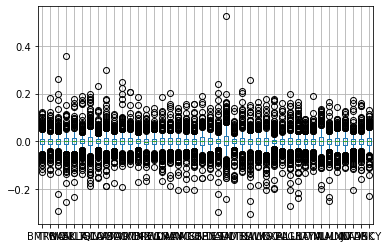

In [402]:
high_vol_data.boxplot()

In [403]:
high_vol_data_abs=np.abs(high_vol_data)

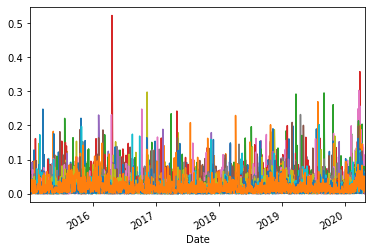

In [404]:
high_vol_data_abs.plot(legend=False)

In [405]:
#these spikes are due to earnings or company related news most likely

In [406]:
high_vol_data_corr=high_vol_data.corr()

In [407]:
high_vol_data_corr=high_vol_data_corr[high_vol_data_corr>.5]

In [408]:
high_vol_data_corr

,BMRN,TTWO,BIIB,AAL,SPLK,KLAC,TSLA,QCOM,NVDA,ASML,...,LULU,LBTYA,ATVI,MU,ILMN,ALXN,JD,NTAP,ADSK,INCY
BMRN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.539711,NaN,NaN,NaN,0.568995
TTWO,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.620834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIIB,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPLK,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604228,NaN
KLAC,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.501439,0.559399,0.677312,...,NaN,NaN,NaN,0.578082,NaN,NaN,NaN,NaN,0.523811,NaN
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QCOM,NaN,NaN,NaN,NaN,NaN,0.501439,NaN,1.000000,NaN,0.506289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NVDA,NaN,NaN,NaN,NaN,NaN,0.559399,NaN,NaN,1.000000,0.562813,...,NaN,NaN,NaN,0.564936,NaN,NaN,NaN,NaN,NaN,NaN
ASML,NaN,NaN,NaN,NaN,NaN,0.677312,NaN,0.506289,0.562813,1.000000,...,NaN,NaN,NaN,0.585027,NaN,NaN,NaN,NaN,0.566727,NaN


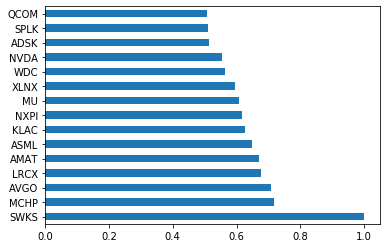

In [409]:
Group1_high=high_vol_data_corr['SWKS'].dropna()
Group1_high.sort_values(ascending=False).head(20).plot(kind='barh')

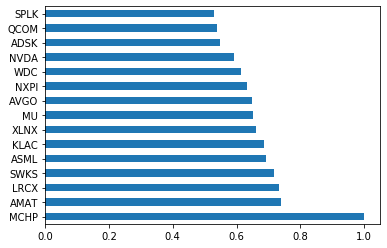

In [410]:
Group2_high=high_vol_data_corr['MCHP'].dropna()
Group2_high.sort_values(ascending=False).head(20).plot(kind='barh')

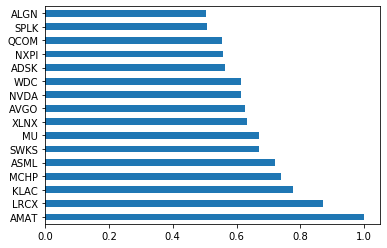

In [411]:
Group3_high=high_vol_data_corr['AMAT'].dropna()
Group3_high.sort_values(ascending=False).head(20).plot(kind='barh')

In [412]:
#These are the only groups that fit my requirement
#one intresting thing i noticed is as volitility increases the correlation between stocks decreases alot

# Decomposing 

In [413]:
Group1_high_decompose=seasonal_decompose(high_vol_data['SWKS'],freq=30)
Group1_high_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [414]:
Group2_high_decompose=seasonal_decompose(high_vol_data['MCHP'],freq=30)
Group2_high_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [415]:
Group3_high_decompose=seasonal_decompose(high_vol_data['AMAT'],freq=30)
Group3_high_decompose.plot()

NameError: name 'seasonal_decompose' is not defined

In [416]:
#same as the other low and mid volitlity, these stocks look flat with some seasonal aspect

# Sumarizing finds of EDA
I found that there are multiple stocks within each volitlity group that have a correlation with each other 
This helped me create more groups within my groups. Also as volitlity went up the number of correlations went down 
Lastly all of my group follow the same decompositon analysis where there is no trend and slight seasonality

# Baseline Modeling using the mean
For my baseline method i am going to try to predict the mean for all of my companies. This will be my baseline model.


In [433]:
X=data_daily_change['BMRN']
train=X[:1000]
test=X[1000:]

In [434]:
train_mean=np.full(len(train),fill_value=train.mean())

In [435]:
from sklearn.metrics import mean_squared_error

In [440]:
np.sqrt(mean_squared_error(train,train_mean))

0.02393383285158313

In [437]:
test_mean=np.full(len(test),fill_value=train.mean())

In [439]:
np.sqrt(mean_squared_error(test,test_mean))

0.024563460288283465

In [643]:
mean_baselines = {}
#rmse_train=[]
#rmse_test=[]
for i in data_daily_change:
    mean_baselines[i] = {}
    train=data_daily_change[i][:1000]
    test=data_daily_change[i][1000:]
    y_hat_train=np.full(len(train),fill_value=train.mean())
    y_hat_test=np.full(len(test),fill_value=train.mean())
    rmse_train=(np.sqrt(mean_squared_error(train,y_hat_train)))
    rmse_test=(np.sqrt(mean_squared_error(test,y_hat_test)))
    mean_baselines[i]['training error'] = rmse_train
    mean_baselines[i]['testing error'] = rmse_test
    

In [492]:
for columns,number in zip(list(data_daily_change[data_daily_change.columns]),rmse_test):
    rmse_test.append((columns,number))
for columns,number in zip(list(data_daily_change[data_daily_change.columns]),rmse_train):
    rmse_train.append((columns,number))
    


In [493]:
rmse_test=rmse_test[93:]
rmse_train=rmse_train[93:]

# Seeing if a basic arima model is better than my baseline model

After my simple baseline models i am going to try and come up with ways where i can reduce my rmse scores for both my train and test

In [621]:

arima_baseline={}

for i in data_daily_change:
    arima_baseline[i]={}
    train=data_daily_change[i][:1000]
    test=data_daily_change[i][1000:]
    arima_train=ARIMA(train,order=(1,0,0))
    arima_test=ARIMA(test,order=(1,0,0))
    res_train=arima_train.fit()
    res_test=arima_test.fit()
    forecast_train=res_train.forecast(steps=1000)[0]
    forecast_test=res_test.forecast(steps=334)[0]
    arima_rmse_train=(np.sqrt(mean_squared_error(train,forecast_train)))
    arima_rmse_test=(np.sqrt(mean_squared_error(test,forecast_test)))
    arima_baseline[i]['training error']=arima_rmse_train
    arima_baseline[i]['testing error']=arima_rmse_test
    
    
    
    

In [657]:
data_daily_change['GOOG'].mean()

0.000801404069883769

In [656]:
train=data_daily_change['GOOG'][:1000]
test=data_daily_change['GOOG'][1000:]
arima_train=ARIMA(train,order=(1,0,0))
    #arima_test=ARIMA(test,order=(1,0,0))
res_train=arima_train.fit()
    #res_test=arima_test.fit()
forecast_train=res_train.forecast(steps=1000)[0]
    #forecast_test=res_test.forecast(steps=334)[0]
arima_rmse_train=(np.sqrt(mean_squared_error(train,forecast_train)))
    #arima_rmse_test=(np.sqrt(mean_squared_error(test,forecast_test)))
arima_baseline[i]['training error']=arima_rmse_train
    #arima_baseline[i]['testing error']=arima_rmse_test
print(forecast_train)

[-0.00068891  0.00066883  0.00073261  0.0007356   0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575  0.00073575
  0.00073575  0.00073575  0.00073575  0.00073575  0

In [637]:
arima_baseline

{'BMRN': {'training error': 0.02393380929472752,
  'testing error': 0.024551537265100763},
 'VRSK': {'training error': 0.012037655413719114,
  'testing error': 0.020227852285715508},
 'ORLY': {'training error': 0.01664192211992617,
  'testing error': 0.023771183502821785},
 'INTU': {'training error': 0.014675227811602404,
  'testing error': 0.02566764663088384},
 'WDAY': {'training error': 0.022967864745298373,
  'testing error': 0.027820000622326528},
 'ALGN': {'training error': 0.022377264044076396,
  'testing error': 0.03727271969293668},
 'ASML': {'training error': 0.01795611282792459,
  'testing error': 0.02647652353570103},
 'NTAP': {'training error': 0.019287490357655625,
  'testing error': 0.028680924948098013},
 'ADP': {'training error': 0.012309413863206312,
  'testing error': 0.022716691873952144},
 'EA': {'training error': 0.018421802928006686,
  'testing error': 0.025543532511216334},
 'CSCO': {'training error': 0.013769046358378924,
  'testing error': 0.023197595275335155

In [644]:
to_dataframe = []
for key in zip(arima_baseline.keys)():
    train_scores = arima_baseline[key]['training error'] - mean_baselines[key]['training error']
    test_scores = arima_baseline[key]['testing error'] - mean_baselines[key]['testing error']
    
    to_dataframe.append[train_scores, test_scores]
    baseline_scores=pd.DataFrame(to_dataframe, columns = ['train', 'test'])
    baseline_scores.index = list(arima_baseline.keys())

TypeError: zip argument #1 must support iteration

In [651]:
to_dataframe = []
for key in arima_baseline.keys():
    train_scores = arima_baseline[key]['training error'] - mean_baselines[key]['training error']
    test_scores = arima_baseline[key]['testing error'] - mean_baselines[key]['testing error']
    
    to_dataframe.append([train_scores, test_scores])
    baseline_scores=pd.DataFrame(to_dataframe, columns = ['train', 'test'])
    

In [653]:
baseline_scores.index=list(data_daily_change.columns)

In [654]:
baseline_scores

,train,test
BMRN,-2.355686e-08,-1.192302e-05
VRSK,-9.416092e-07,-5.855537e-05
ORLY,3.571774e-09,-8.339718e-06
INTU,-1.840003e-09,-3.659402e-05
WDAY,-3.666706e-07,-1.716667e-05
...,...,...
AMD,3.910835e-07,-4.403056e-05
INCY,2.205849e-07,-6.339716e-05
NTES,9.652178e-12,-5.467729e-07
GILD,5.429429e-07,-5.270955e-05


In [650]:
pd.DataFrame(mean_baselines).T

,training error,testing error
BMRN,0.023934,0.024563
VRSK,0.012039,0.020286
ORLY,0.016642,0.023780
INTU,0.014675,0.025704
WDAY,0.022968,0.027837
...,...,...
AMD,0.041908,0.037989
INCY,0.027985,0.023446
NTES,0.024856,0.026659
GILD,0.016330,0.020475


In [641]:
arima_baseline['BMRN']['training error']

0.02393380929472752

In [567]:
dif=[]
for i in rmse_train:
    for j in arima_rmse_train:
        dif.append(i[1]-j)
    

In [575]:
sum(dif)/len(dif)

-3.429358480287335e-08

In [ ]:
# As you can see my arima model has done better than my baseline model

In [ ]:
# create combinatorics